### 구간추정


**배우는 이유**

 - 표본평균과 불편분산이 각각 모평균과 모분산의 좋은 추정량

 - 표본평균 및 불편분산은 확률변수로 편향된 표본을 추출해버린다면 예상과 다른 추정이 될 가능성이 있다.

 - 사전에 예상되는 오차를 예측하고, 모평균이나 특정 값이 아니라 범위에 있다는 주장을 할 수 있게 되어서 더 안정적인 좋은 추정이 된다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [ ]:
#파이싼 Scikit-learn 기반 기초 데이터 세팅(RM: 가구당 평균 방 수)
from sklearn.datasets import load_boston

boston_houseprice_data = load_boston()

df = pd.DataFrame(
    data = boston_houseprice_data.data,
    columns = boston_houseprice_data.feature_names
)
rooms = np.array(df['RM'])

In [3]:
p_mean = np.mean(rooms)
p_var = np.var(rooms)

p_mean, p_var


(6.285, 0.493)

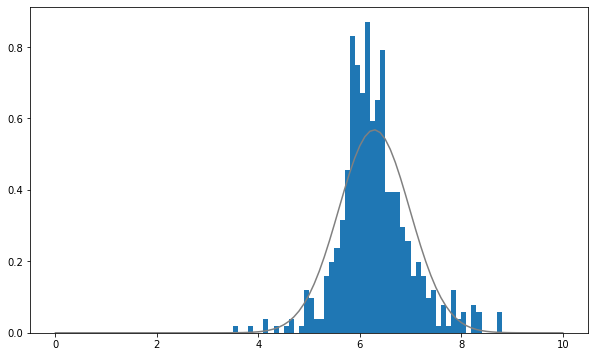

In [4]:
#기초데이터분포와 정규분포의 유사성 확인

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.arange(101)/10
rv = stats.norm(p_mean, np.sqrt(p_var))
ax.plot(xs,rv.pdf(xs), color ='gray')
ax.hist(rooms, bins=100, range=(0,10), density=True)

plt.show()

In [7]:
np.random.seed(0)
n=20
sample = np.random.choice(rooms, n)
sample

array([5.572, 6.03 , 6.021, 7.178, 5.708, 6.438, 7.875, 6.112, 6.004,
       5.404, 6.826, 6.358, 6.63 , 6.121, 6.417, 6.437, 7.007, 6.405,
       6.567, 6.8  ])

In [8]:
np.random.seed(111)
n_samples=10000
samples = np.random.choice(rooms, (n_samples, n))

In [9]:

#모평균의 점추정 표본평균 및 표본평균의 기대값

for i in range(5):
    s_mean =np.mean(sample[i])
    print(f'{i+1}번째 표본평균: {s_mean:.3f}')

1번째 표본평균: 5.572
2번째 표본평균: 6.030
3번째 표본평균: 6.021
4번째 표본평균: 7.178
5번째 표본평균: 5.708


In [10]:
sample_means = np.mean(samples, axis=1)
np.mean(sample_means)

6.286

In [12]:
np.mean(np.random.choice(rooms, int(1e6)))

6.284

In [13]:

#모분산의 점추정 표본분산 및 표본분산의 기대값

for i in range(5):
    s_var = np.var(samples[i])
    print(f'{i+1}번째 표본분산: {s_var:.3f}')

1번째 표본분산: 0.589
2번째 표본분산: 0.360
3번째 표본분산: 0.486
4번째 표본분산: 0.360
5번째 표본분산: 0.319


In [14]:
sample_vars = np.var(samples, axis=1)
np.mean(sample_vars)

0.473

In [15]:
#var 함수에 delta degree of freedom=1을 지정하면 계산 가능

sample_u_vars = np.var(samples, axis=1, ddof=1)
np.mean(sample_u_vars)

0.498

In [16]:
#1,000,000개 샘플의 불편분산 계산시 모분산인 0.492과 거의 같아짐: 일정추정량 만족

np.var(np.random.choice(rooms, int(1e6)), ddof=1)

0.492

In [11]:
#구간추정: 모분산 알 때 정규분포의 모평균의 신뢰구간 일반화
#신뢰구간: 95%개선

rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(p_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(p_var/n)

lcl, ucl


(5.400, 6.016)

### 신뢰구간 해석시 범하기 쉬운 오류

- 95% 신뢰구간이[5.400,6.016]이라면, 모평균이 95%확률로 위 범위에 들어가나?

   - 그렇지 않다.

   - 모평균 신뢰구간 추정을 100번하면 95번 정도의 비율로 모평균이 포함될 것이라는 뜻


- 옳은 해석

   - 동일한 방법으로 수차례 표본추출하여 구간추정 시 95%의 구간추정에는 모평균 포함

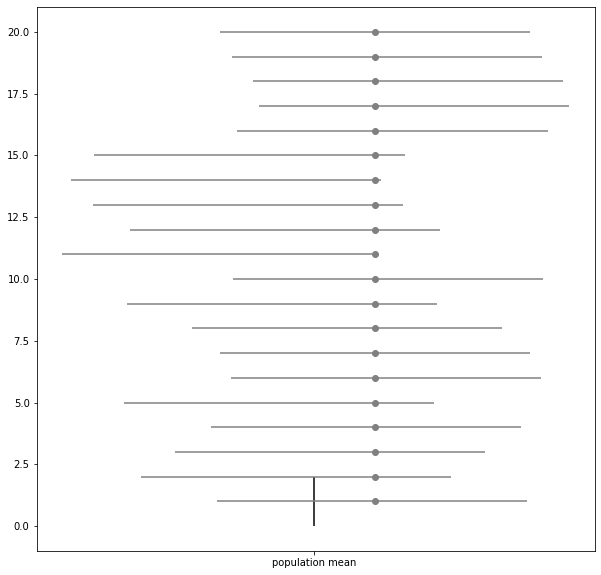

In [20]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

rv = stats.norm()
n_samples = 20
ax.vlines(p_mean, 0,2)
for i in range(n_samples):
    sample_ = samples[i]
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <=p_mean<=ucl:
        ax.scatter(s_mean, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, color='gray')
    else:
        ax.scatter(s_mean, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl, color='b')

ax.set_xticks([p_mean])
ax.set_xticklabels(['population mean'])

plt.show()

In [21]:
#신뢰구간 해석을 위한 10,000회 추정시 모평균을 포함할 확률 계산

rv = stats.norm()
cnt =0

for sample_ in samples:
    s_mean = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)

    if lcl <= p_mean <= ucl:
        cnt +=1
cnt/len(samples)
##100% 모평균 포함

1.000

### 구간추정 정규붐포의 모분산



In [28]:
#10000개 표본 데이터 기반 Y의 표본데이터 생성
sample_y = sample_u_vars * (n-1) / p_var
sample_y

array([23.913, 14.632, 19.733, ...,  6.311, 17.068, 30.739])

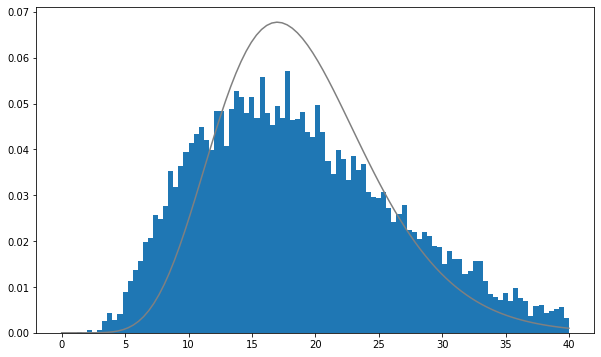

In [29]:
#카이제곱 : Y의 표본데이터와 시각화

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0,40,100)
rv = stats.chi2(df=n-1)
ax.plot(xs, rv.pdf(xs), color='gray')
hist,_,_ = ax.hist(sample_y, bins=100, range=(0,40), density=True)

plt.show()

In [32]:
#구간 추정 - 모평균 모를 때 정규분포 모분산의 신뢰구간 일반화
#표본데이터로 모분산의 95%신뢰구간 계산
rv = stats.chi2(df=n-1)
lcl = (n-1) * p_var / rv.isf(0.025)
hcl = (n-1) * p_var / rv.isf(0.975)

lcl, hcl

(0.285, 1.051)

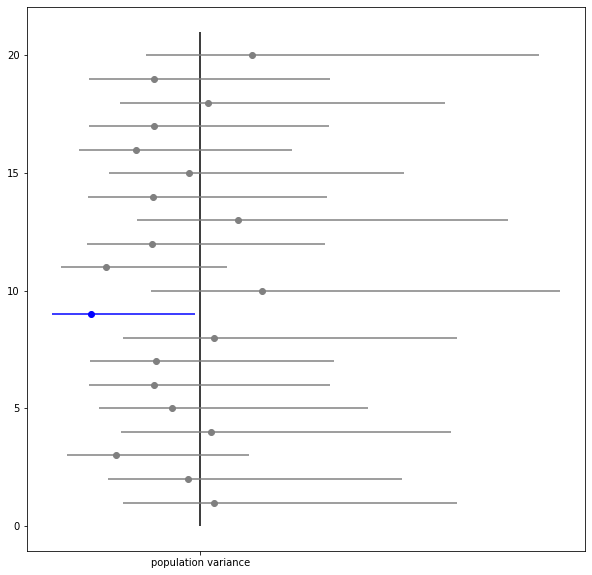

In [33]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

rv = stats.chi2(df=n-1)
n_samples = 20
ax.vlines(p_var, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        ax.scatter(u_var_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, 'gray')
    else:
        ax.scatter(u_var_, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl, 'b')
ax.set_xticks([p_var])
ax.set_xticklabels(['population variance'])

plt.show()

In [34]:
rv = stats.chi2(df=n-1)
cnt = 0
for sample_ in samples:
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        cnt += 1
        
cnt / len(samples)
#100번 추정시 약 84.1%가 모분산을 포함하고 있다(95%와의 차이가 있다)

0.841

### 구간추정- 정규분포의 모평균(모분산 모를때)

- 실제로는 모평균과 모분산을 모르는 경우가 대부분이다.

- 불편분산을 기반으로한 표준오차로 대신 사용

- t분포 표준화


In [36]:
rv = stats.t(df=n-1)
lcl = s_mean - rv.isf(0.025) * np.sqrt(p_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(p_var/n)

lcl, ucl

(5.803, 6.460)